# Weather Data Analysis
*Author: Olga Sieradzan*

This notebook focuses on analying and forcating weather patterns using the Weather data set from kaggle. 

***

The notebook is organized as follows:

**Part 1**: Data Cleaning

**Part 2**: Exploratory data analysis

**Part 3**: Temperature forecasting based on historical data - Random forest Research

***


## Data Cleaning

This part consist of getting known the dataset in order to converting data types and handle missing values or Nan's.

***

### Libraries and option setting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Setting up max display in notebook 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

***

## Raw data 

Dataset consist of **14 colums** describing weather at the small town in Poland, collected by the meterodical station. Data was collected since 1980 till 2024 hourly, maiking the dataset **389497 rows** big

The variables in dataset are: 

* Temperature
* Relative humidity
* Dew point
* Precipitation (mm)
* Rain (mm)
* Snowfall (mm)
* Pressure msl (hPa)
* Surface_pressure (hPa)
* Cloud cover (%)
* Cloud cover low (%)
* Cloud cover mid (%)
* Cloud cover high (%)
* Vapour pressure deficit (kPa)
* Wind speed (km/h)





In [3]:
raw_data = pd.read_csv("C:/Users/olgas/OneDrive/Documents/GitHub/Time-Series-Weather-Prediction-Notebook/Data/Weather_Data_1980_2024(hourly).csv", parse_dates = ['time'])
raw_data.head()

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h)
0,1980-01-01 00:00:00,12.7,83,10.0,0.0,0.0,0,1012.8,945.1,1,1,0,0,0.25,7.5
1,1980-01-01 01:00:00,12.9,82,9.9,0.0,0.0,0,1012.2,944.5,4,4,0,0,0.26,7.9
2,1980-01-01 02:00:00,13.2,82,10.2,0.0,0.0,0,1012.3,944.7,13,14,0,0,0.27,7.5
3,1980-01-01 03:00:00,15.9,78,12.0,0.0,0.0,0,1013.5,946.4,23,26,0,0,0.40,6.6
4,1980-01-01 04:00:00,19.4,67,13.1,0.0,0.0,0,1014.6,948.2,9,10,0,0,0.75,8.7


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389496 entries, 0 to 389495
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   time                           389496 non-null  datetime64[ns]
 1   temperature                    389496 non-null  float64       
 2   relative_humidity              389496 non-null  int64         
 3   dew_point                      389496 non-null  float64       
 4   precipitation (mm)             389496 non-null  float64       
 5   rain (mm)                      389496 non-null  float64       
 6   snowfall (cm)                  389496 non-null  int64         
 7   pressure_msl (hPa)             389496 non-null  float64       
 8   surface_pressure (hPa)         389496 non-null  float64       
 9   cloud_cover (%)                389496 non-null  int64         
 10  cloud_cover_low (%)            389496 non-null  int64         
 11  

As the table above show, there will be no problem with data types since all of the data is either intiger or float or datetime. 

Additionally, we dont have to worry about null entries, since there are none of them in the whole dataset.

***

### Outliers 

Another -problems might occure if we dont take care of the outliers. Easy way to spot them is to create box plot for each variables. 




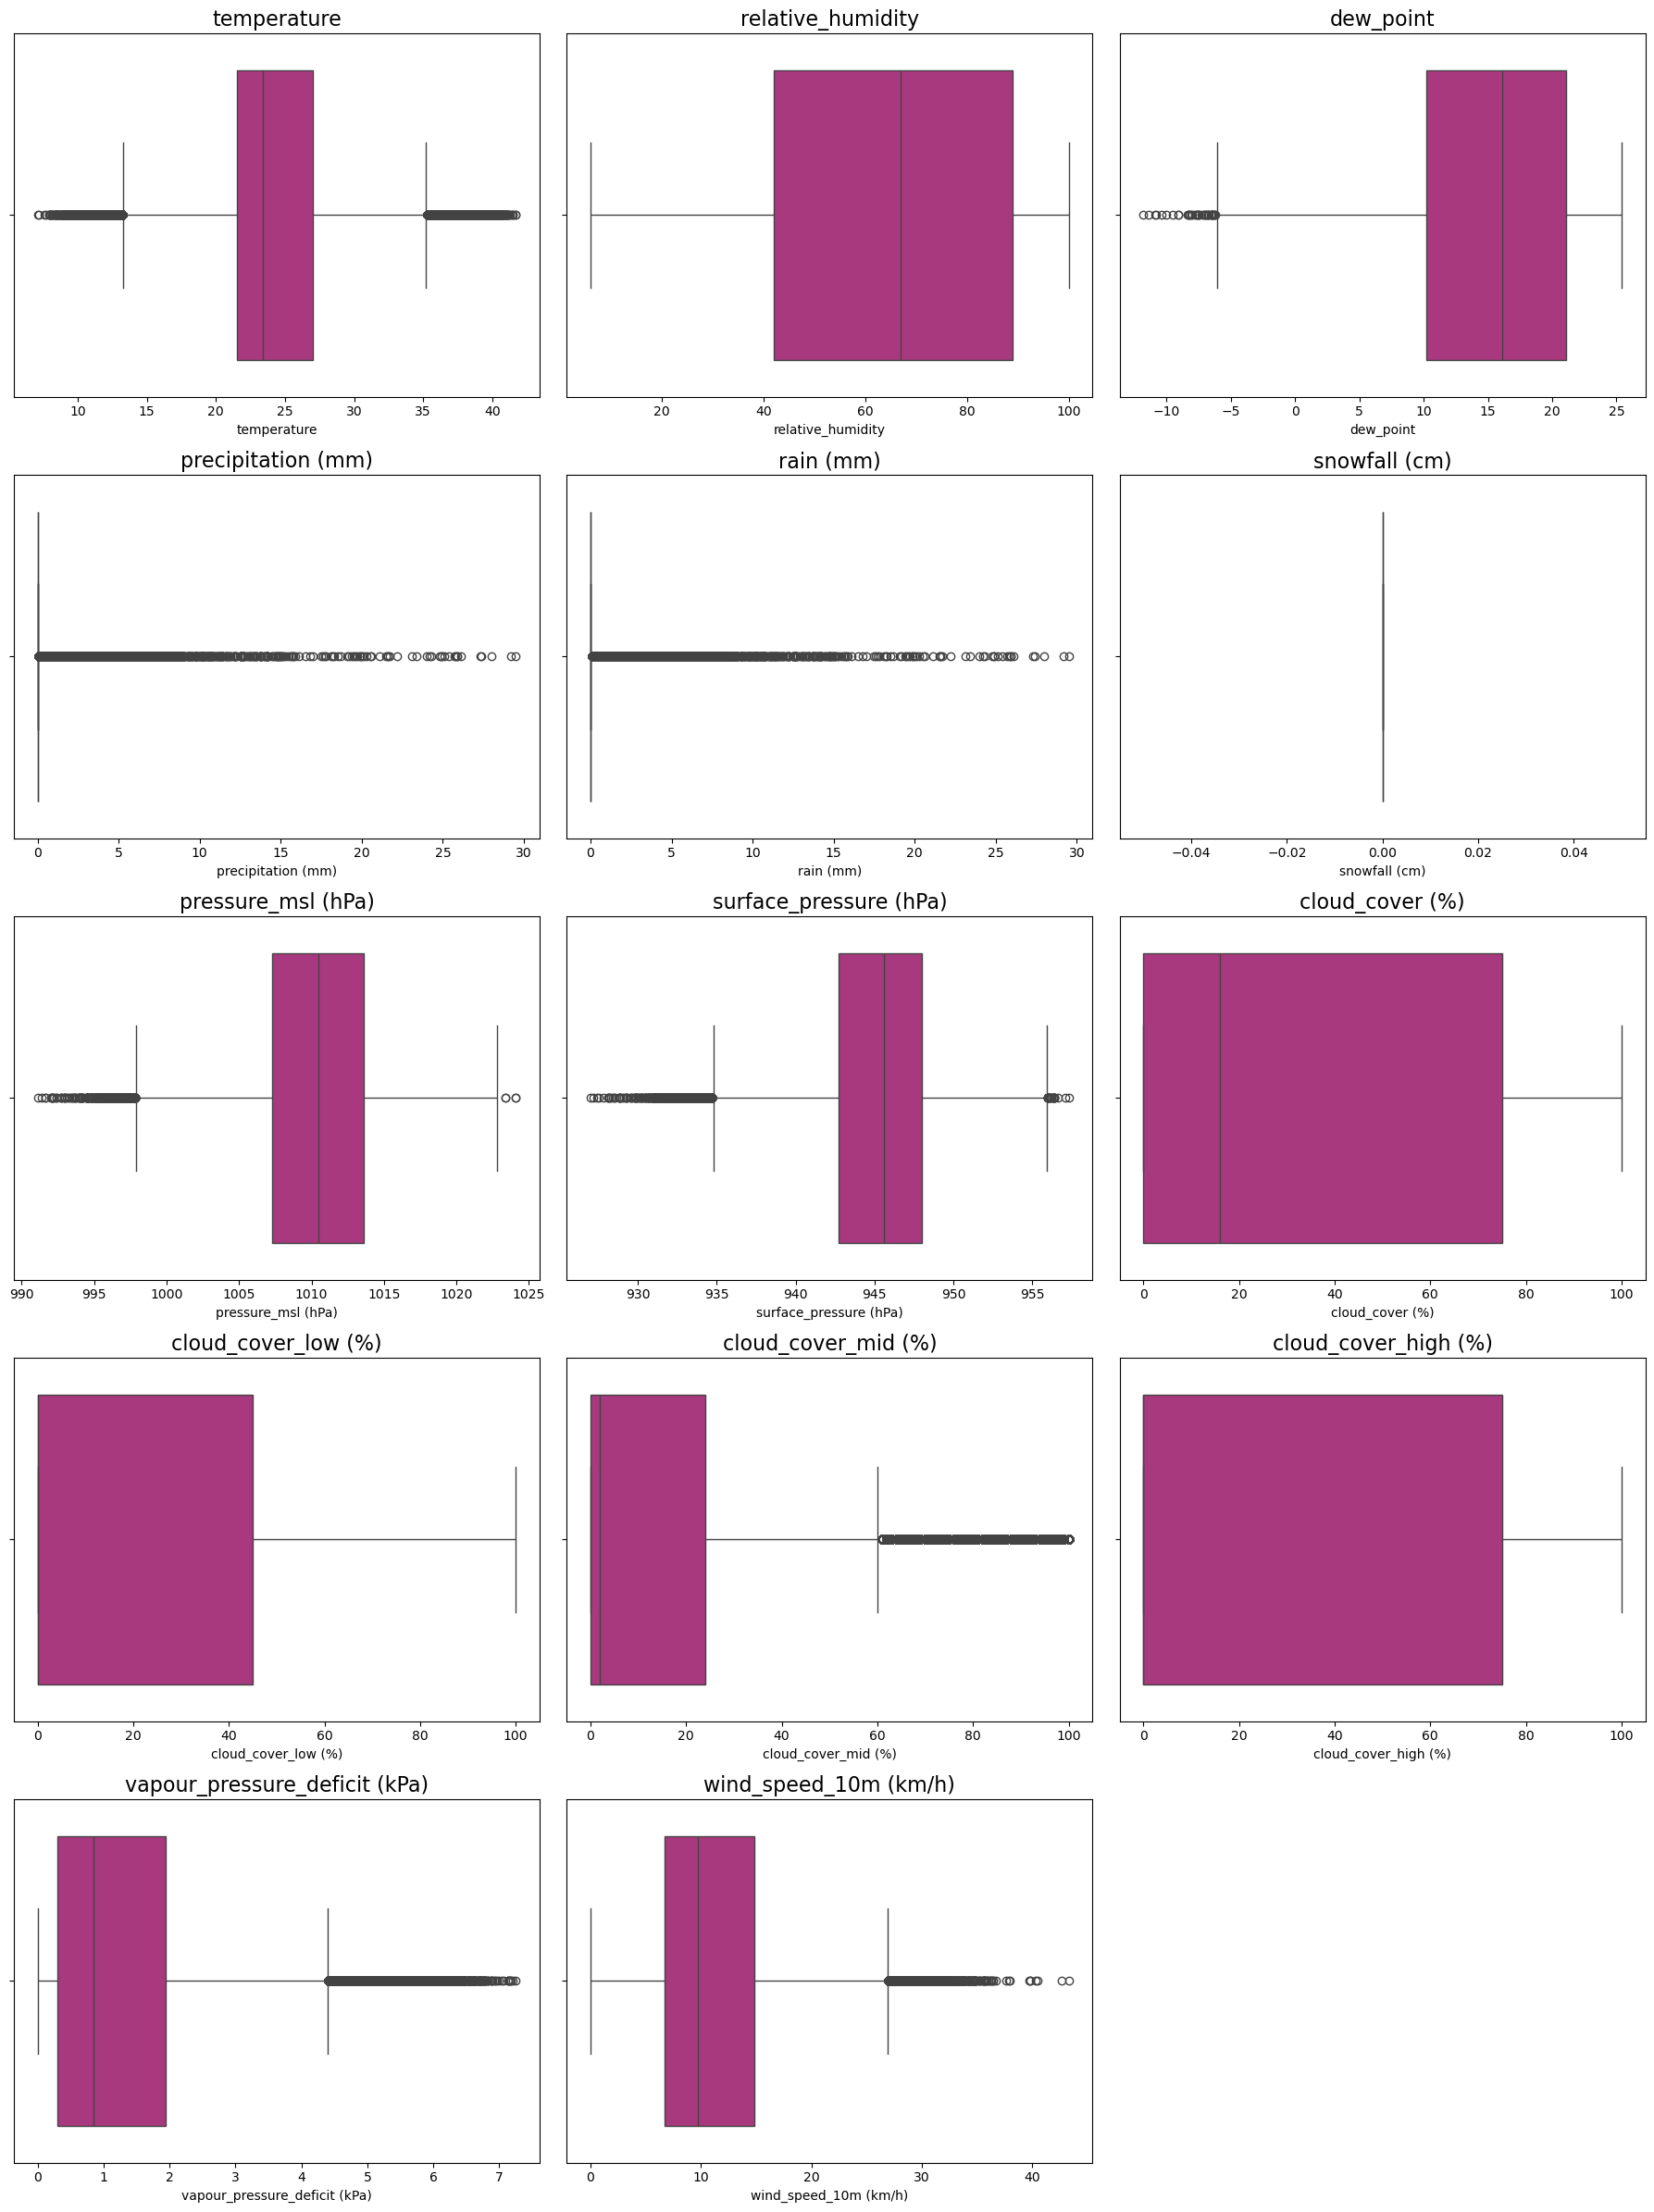

In [5]:
def boxplots (data, var, ax) :
    sns.boxplot(x = data[var], color = "#BA2684", ax = ax)
    ax.set_title(f"{var}", fontsize = 16)

cols = raw_data.columns[1:]
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(cols):
    boxplots(raw_data, col, axes[i])

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***

For now it would be all from data cleaning since we have no null entries and all of the data types are correct and easy to work with. In the next part there will be check of relations, distributions and statistic of considered variables. Based on that information, variables will be selected for a model. 

***

## Exploratory Data Analysis

This project aims to predict temperature based on other weather conditions. In order to create well working model, we need to get to know all of the variables really well. We explore 3 main questions in this EDA section: 

1. How does distribution of variables looks like?
2. What is relationship between weather condition and temperature?
3. What is relationship between weather condtions?



In this part we will learn more about all of the variables and the relation between them. Finally set of varaibles will be chosen that will explain temperature th best. 

***


### Getting to know varaibles

Firstly, it is nice to know distrubutions and statistics of variables we are working with.

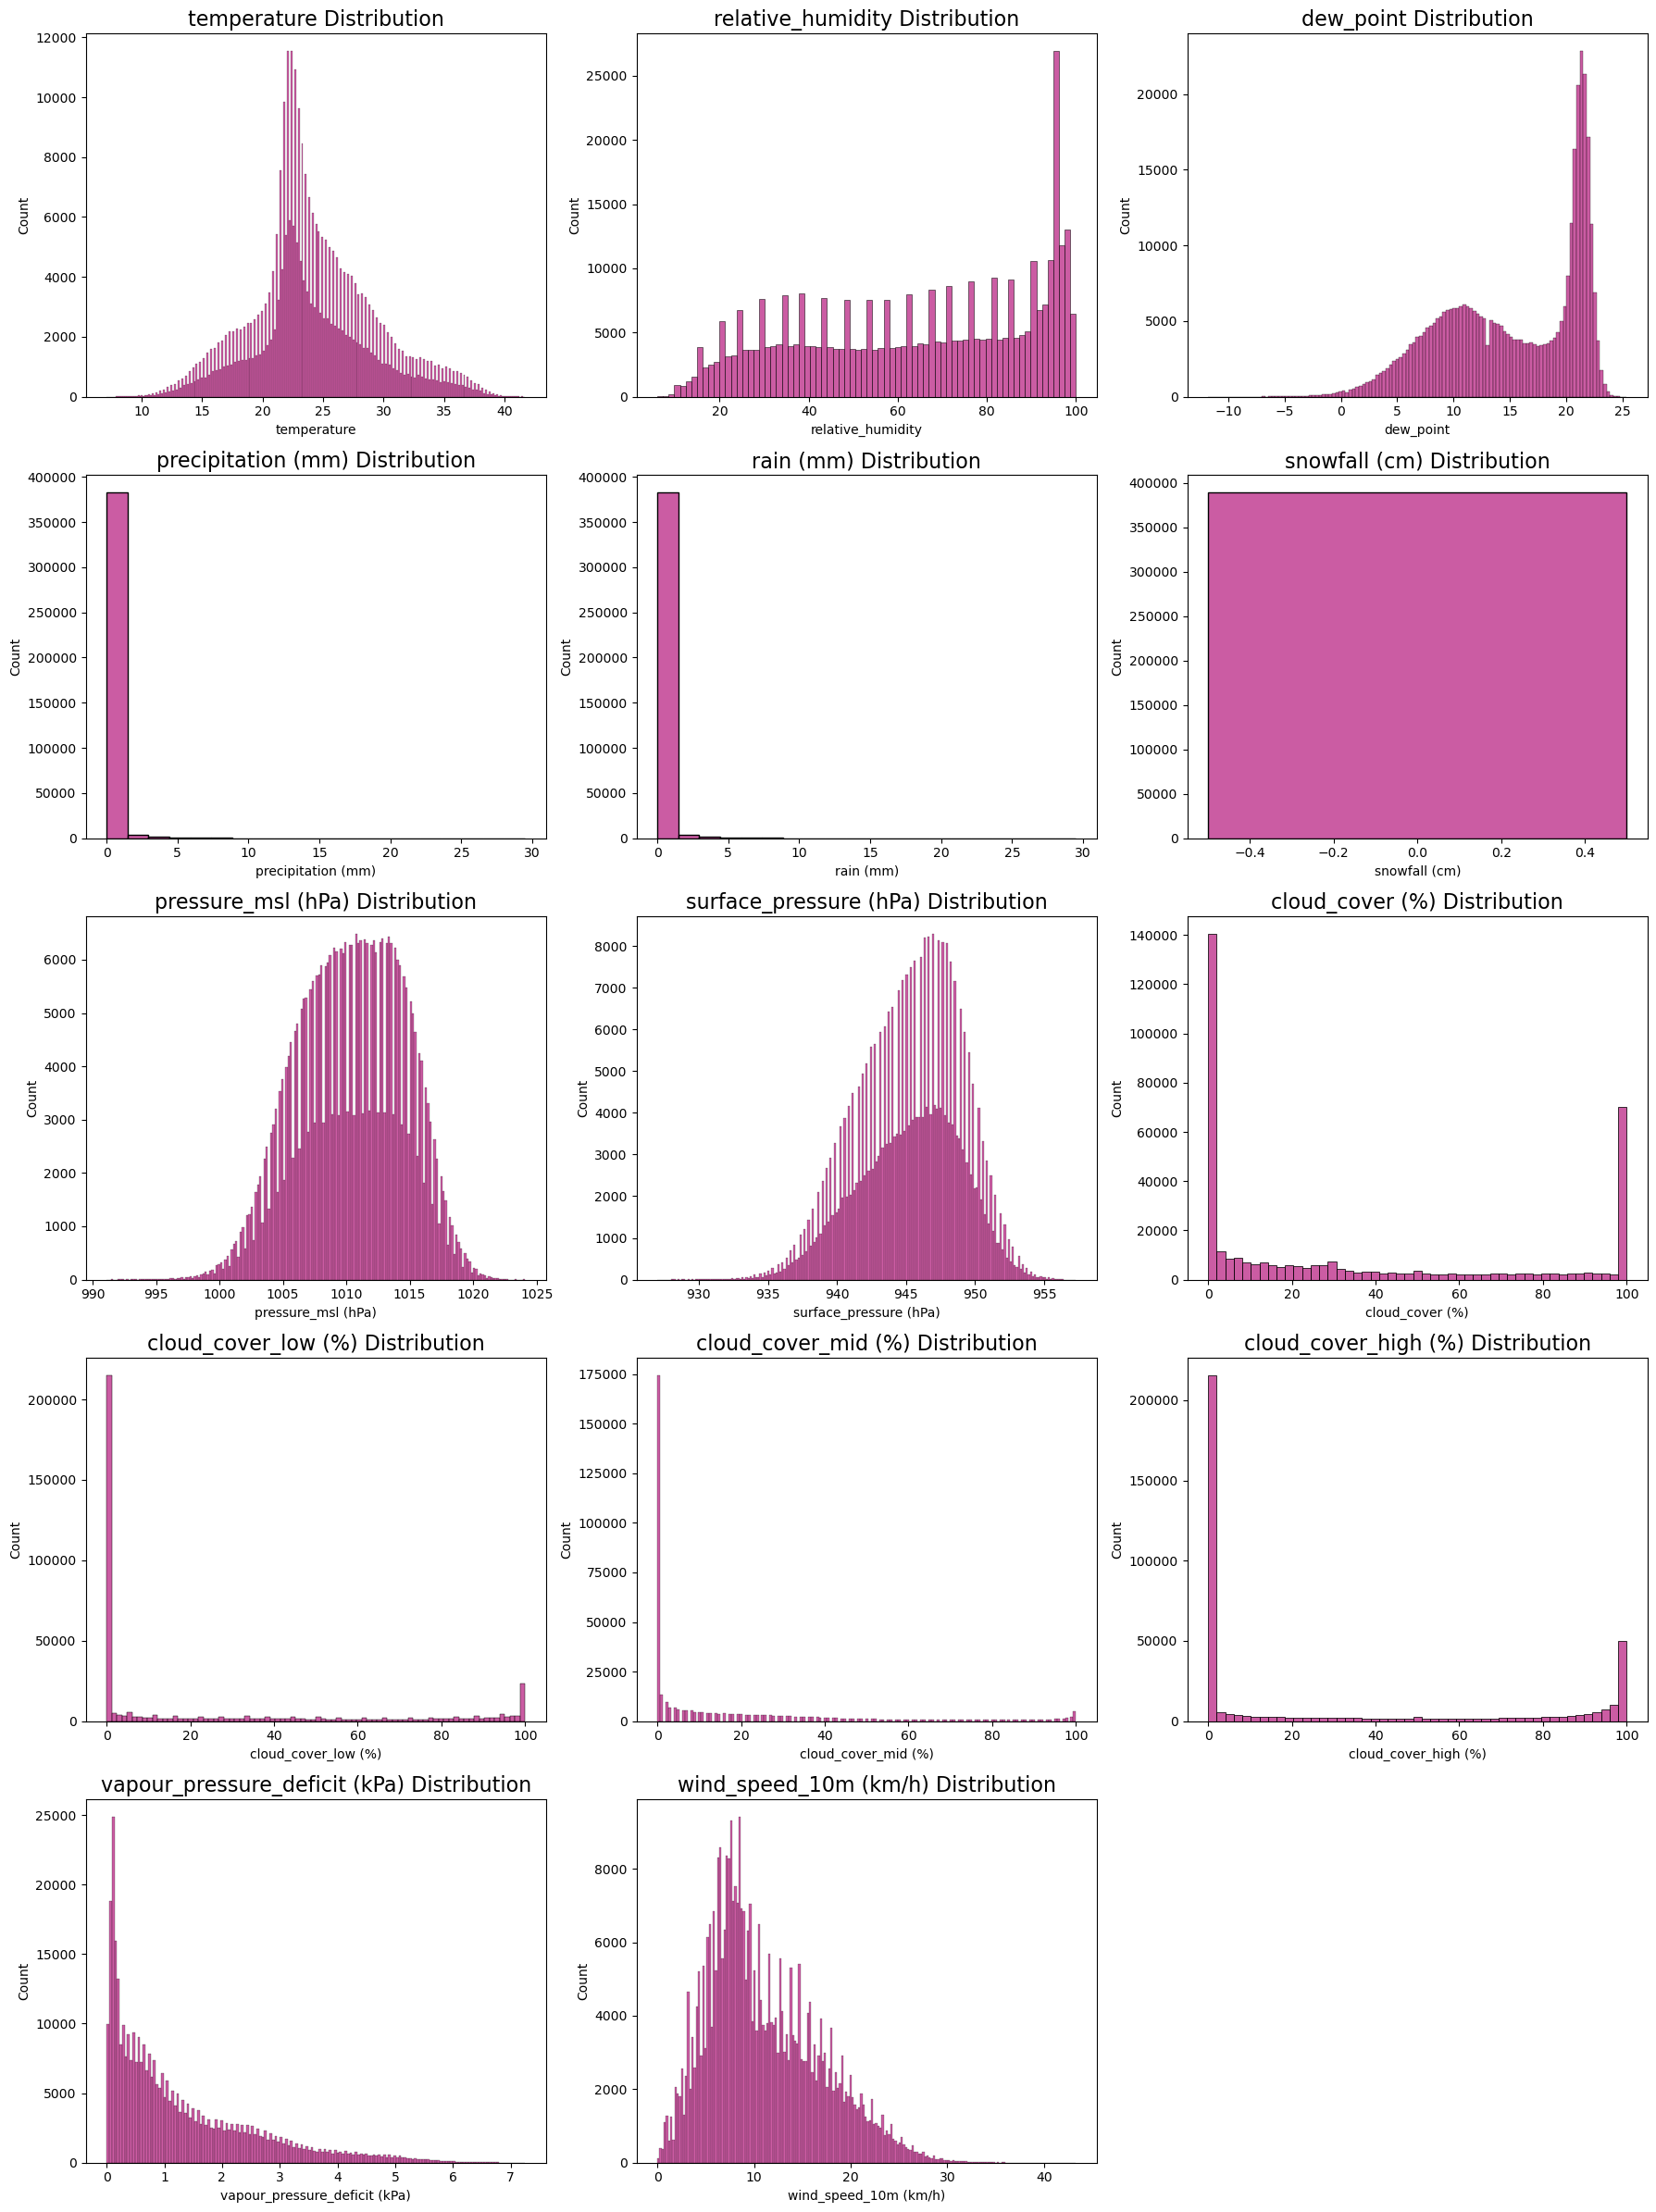

In [12]:
def histplots (data, var, ax) :
    sns.histplot(x = data[var], color = "#BA2684", ax = ax)
    ax.set_title(f"{var} Distribution", fontsize = 16)

cols = raw_data.columns[1:]
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(cols):
    histplots(raw_data, col, axes[i])

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the first look at the graphs, I can thgat that the 'snowfall' variable will be useless during the model bulding. It is needed to drop it from the dataset, as  well as 'time' columne, because it serve no purpouse during this analysis. 

In [13]:

raw_data.describe().round(2)

,time,temperature,relative_humidity,dew_point,precipitation (mm),rain (mm),snowfall (cm),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h)
count,389496,389496.00,389496.00,389496.00,389496.00,389496.00,389496.0,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00,389496.00
mean,2002-03-20 11:30:00.000000512,24.13,63.95,15.23,0.11,0.11,0.0,1010.37,945.28,35.15,24.29,16.73,30.08,1.29,10.99
min,1980-01-01 00:00:00,7.10,6.00,-11.80,0.00,0.00,0.0,991.10,927.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1991-02-09 05:45:00,21.50,42.00,10.20,0.00,0.00,0.0,1007.30,942.70,0.00,0.00,0.00,0.00,0.30,6.70
50%,2002-03-20 11:30:00,23.40,67.00,16.10,0.00,0.00,0.0,1010.50,945.60,16.00,0.00,2.00,0.00,0.85,9.70
75%,2013-04-28 17:15:00,27.00,89.00,21.10,0.00,0.00,0.0,1013.60,948.00,75.00,45.00,24.00,75.00,1.94,14.80
max,2024-06-06 23:00:00,41.70,100.00,25.40,29.50,29.50,0.0,1024.10,957.30,100.00,100.00,100.00,100.00,7.25,43.30
std,NaN,5.00,25.82,6.10,0.57,0.57,0.0,4.18,3.72,39.43,35.53,26.15,40.57,1.26,5.80




***

Beside information about model usefullnes, we can also learn a lot about the type of climate that is in the place where measures where taken from:

| Weather variable | Description |
| ------------------| -------- |
| Temperature| Really hight mean temperature, thought all of the measure it doesnt even go below 7 degrees |
| Relative humidity | Quite high - points into rather humid enviroment |
| Dew point | Bimodal type of distribiution - ponits into sezon type of weather like: warmer/colder sezon |
| Precipitation | Most values are zeros - most days are withot rain |
| Rain | Really close to precipitation wuth the same conclusions - most days are without rain |
| Snowfall | All values are 0 - no snow in this place |
| Preasure | Normal atmosfere preasure is 1013.25 - in this place the overall avrage is below that. That fact can indicate that researched place might be in mointains or in low preasure climate sphere |
| Cloud coverage |  Rather close to zero in all three categorize - not much clouding |
| Vapour preasuure deficit | The distribiution consist of arther smaller values - that means that the air is highly humid, just like the realtive humidity variables pointed out |
| Wind speed | Most of the days there is a slight wind , and for some days we have stronger wind. this is quite normal distribuition for the wind|

To sum up - researched place is a warm place with humid air, there is rarely rain/clouds and no snow, with moderate wind. 



***

From the first look at the distributions and statistics we can also tell which variables probably will be problematic in our analysis:

1. Cloud covarages variables have specific looking distributions - almost all of the values are 0 or 100. This type of variable most probably won't be very usefull druring analysis, but it is needed to check relation between those variables and the temperature.

2. Precipitation and rain variables are also distibited in the way that will be possibly wiuth no use for analysis - 90% of values seems to be exact 0

3. All of other variables seems to be usefull for the analysis - all of the are rather highly right or left wing skewness

As written befor - we will drop two useless columns 

In [14]:
raw_data.drop(["time", "snowfall (cm)"], axis = 1, inplace = True)

***



### Checking the relation between temerature and other weather conditions

The importnat part in analysis is checking how the wather conditions are related to the temperature. In order to do that we will plot some scatter plots and check the correlation

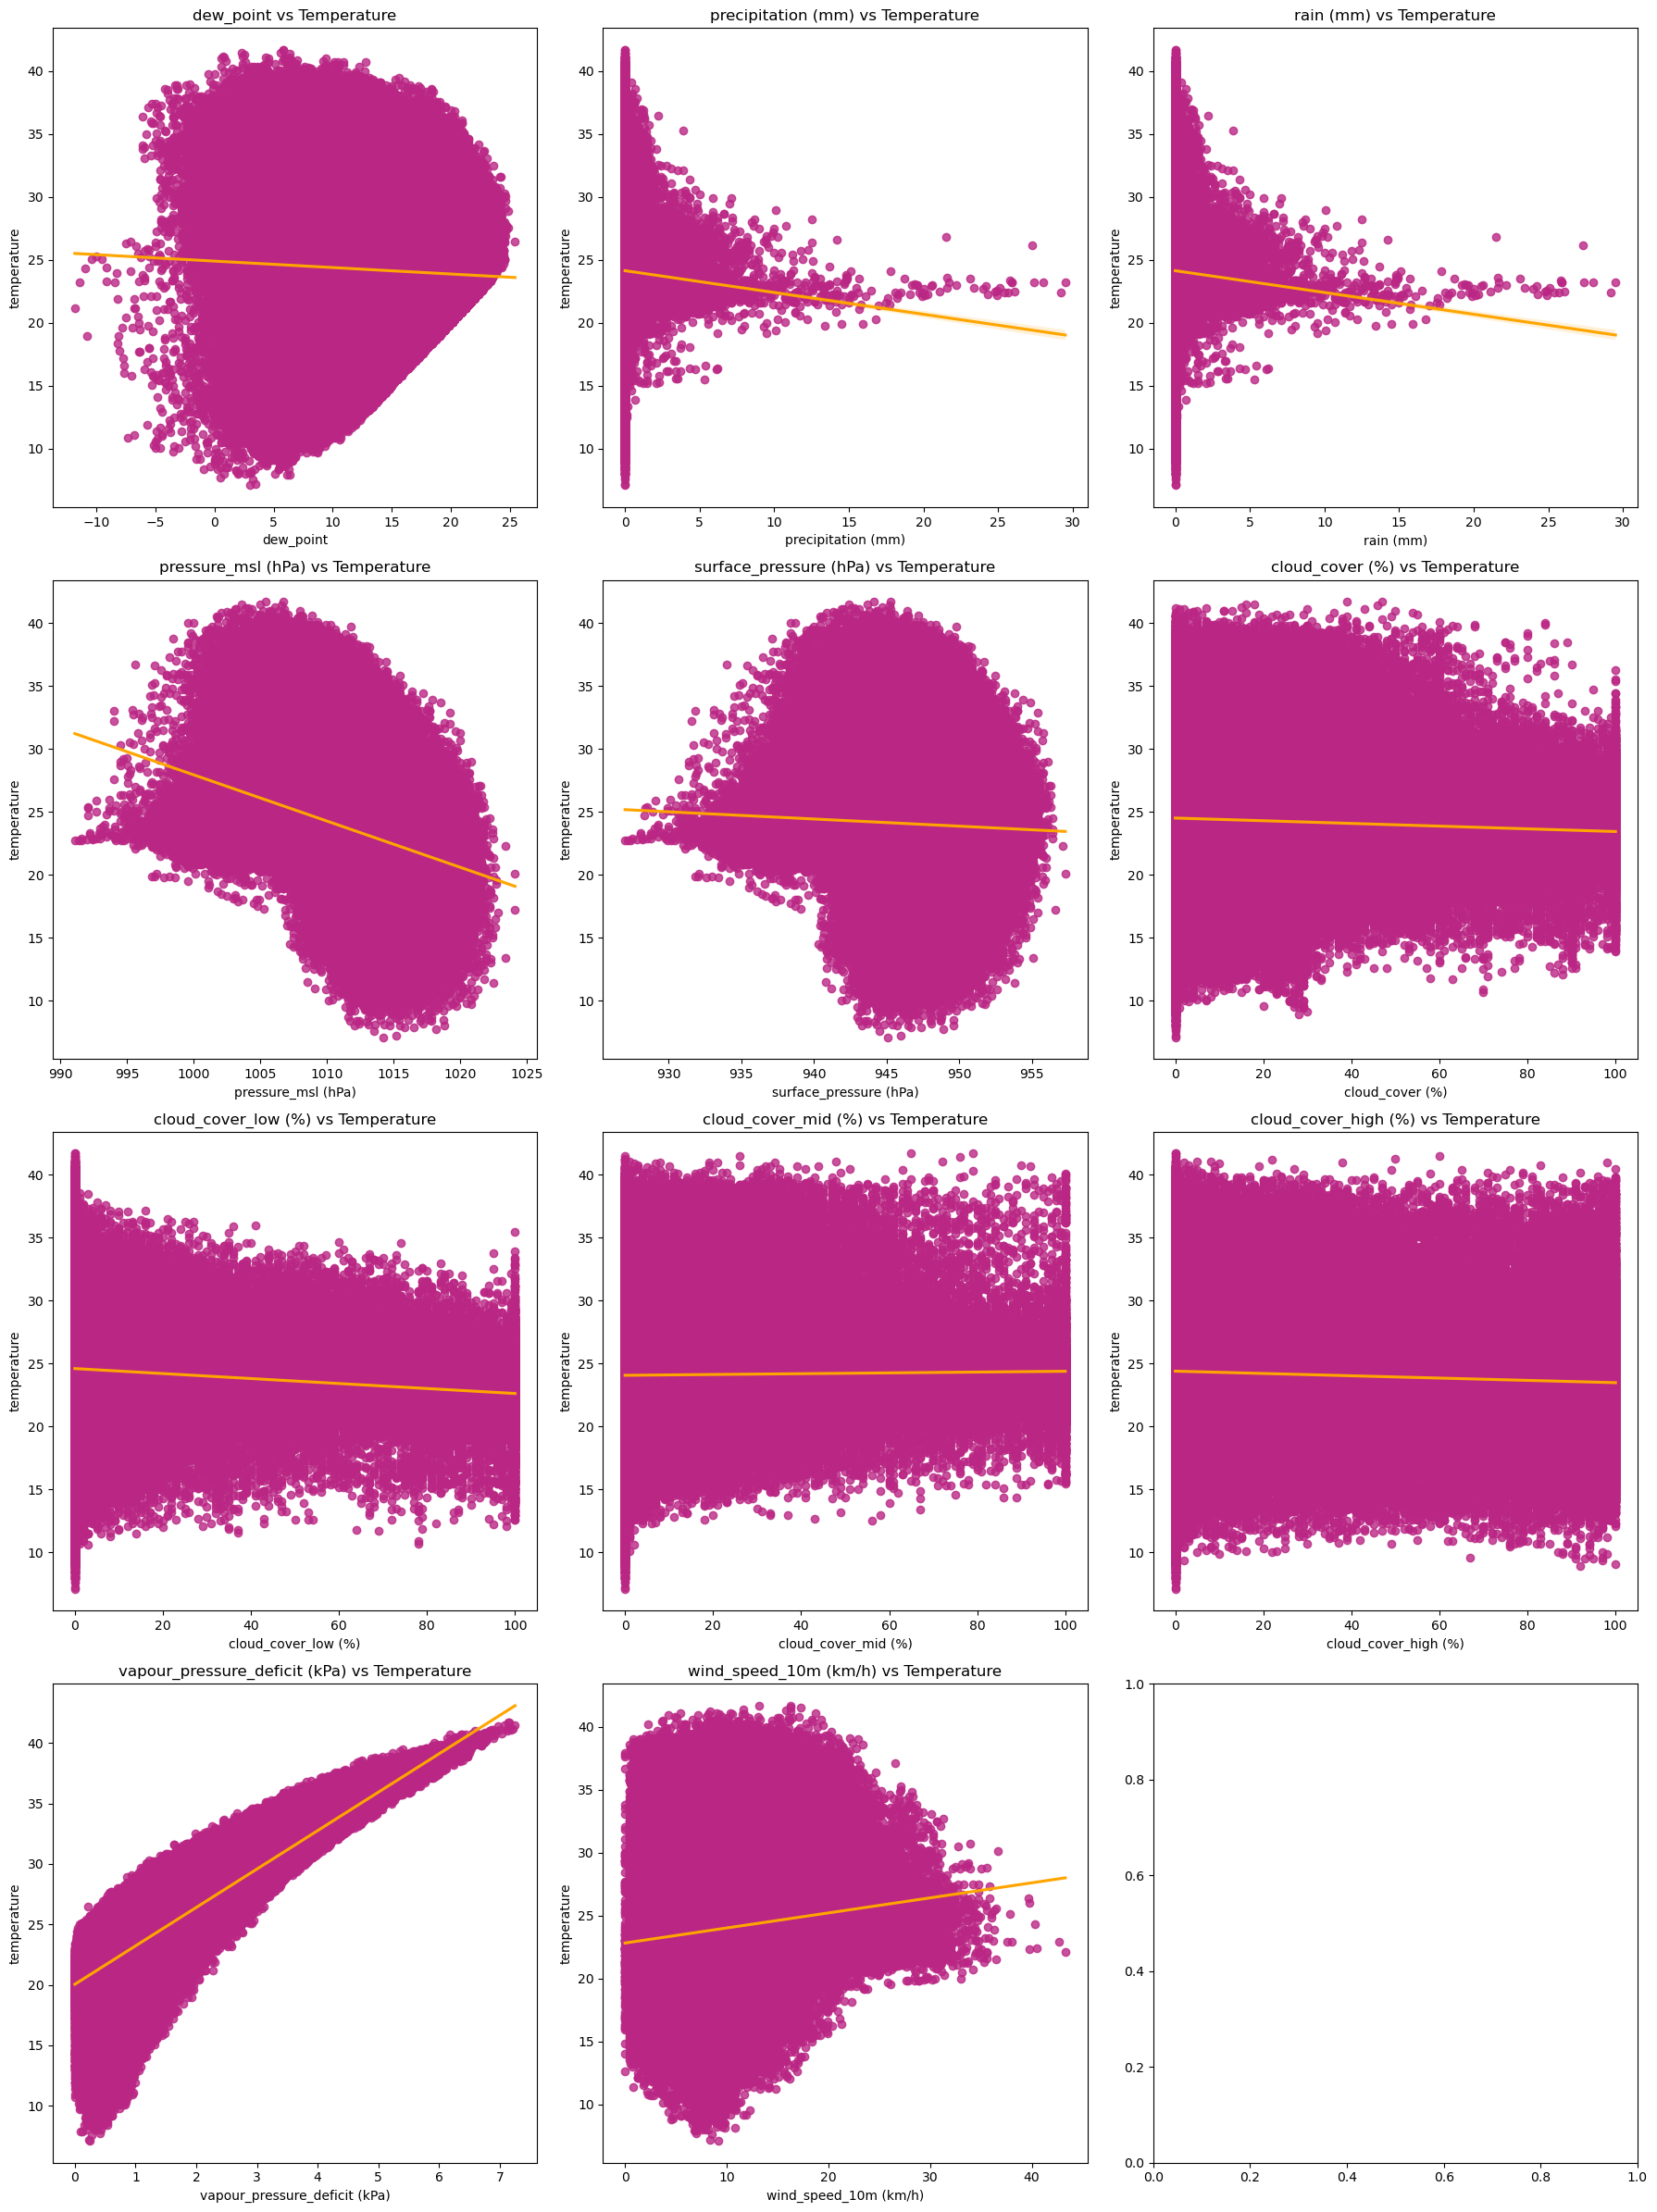

In [ ]:
def scatter_plots (data, var, ax) :
    sns.regplot(x = data[var], y = data['temperature'], line_kws ={"color": "orange"}, color = "#BA2684", ax = ax)
    ax.set_title(f"{var} vs Temperature")

cols = raw_data.columns[2:]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(cols):
    scatter_plots(raw_data, col, axes[i])

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Beside scatter plots, for relationship determinations, we need correlation. For this variables, spearman correlation was chosen because of the unkonw type of relationship between the weather conditions and temperature ( we don't know if it is linear )

In [16]:
raw_data.corr(method='spearman')['temperature'].sort_values(ascending=False).to_frame()

,temperature
temperature,1.000000
vapour_pressure_deficit (kPa),0.685187
wind_speed_10m (km/h),0.161938
cloud_cover_mid (%),0.100625
precipitation (mm),-0.000349
rain (mm),-0.000349
dew_point,-0.022954
cloud_cover (%),-0.026543
cloud_cover_high (%),-0.042808
surface_pressure (hPa),-0.051488


Analyzing scatter plots and results of spearman correlation calculation we can determine weather condition that has strong relation with temperature: 

1. Vapour preasure (positive ralation) 
2. Wind Speed (positive relation)
3. Cloud coverage low (negative relation)
4. Preasure (negative relation)
5. Relative humidity (negative relation)

All of correlation written above are higher ten 10%. The rest of the weather conditions are mearly correlated to the temperature. This will be very helpfull during eg. Linear Regression

***

### Checking the relationship between wather conditions

Usefull plot for checking how strongly variables are related with eachother is corplot. It shows all of the correlations by number rounded to two decimal places and additionaly colors it, for easier recognition. 

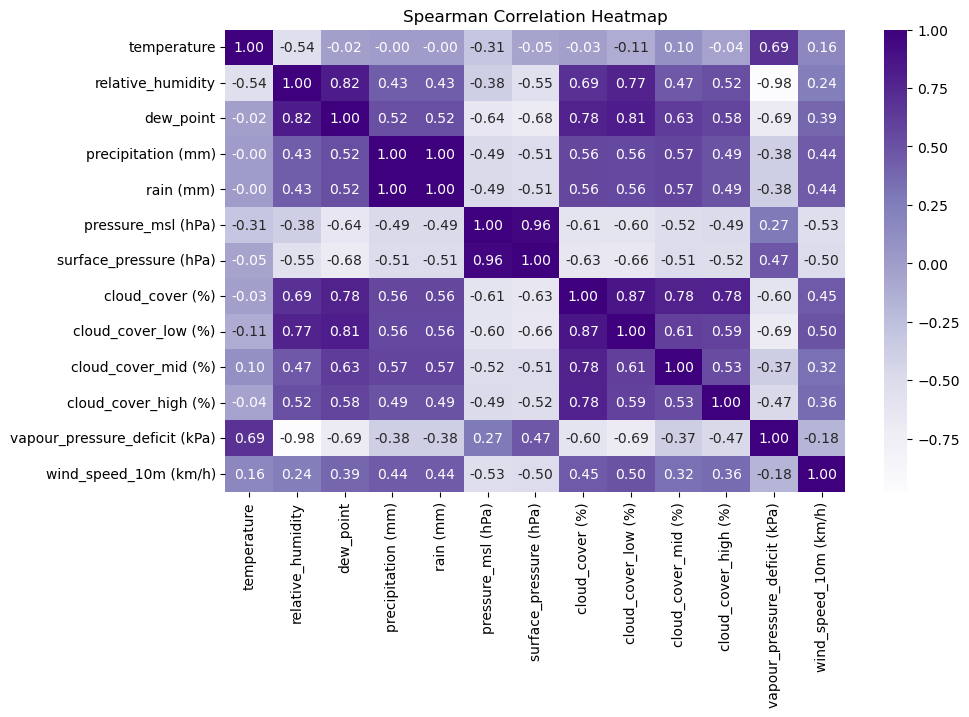

In [23]:
corr = raw_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(raw_data.corr(method='spearman'), annot=True, cmap='Purples', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

A lot of the variables are highly correlated with each other - which is quite predictable for a weather condtions, for example: If it rains, there will be preasure drop. We can also see that there is a lot of 'doubled' variables like: relative humidity and vapor deficit or all of the cloud coverages variables. 

***

## Temperature forecating based on historical data 

In this part, after we cleaned the data and get to know it well, we are finnaly ready to create some models forecasting temperature

***

### Data dividing

Befor diving into modeling , we need to part a data for training and testing part.

In [26]:
features = raw_data.columns[2:]   
X = raw_data[features]
Y = raw_data['temperature']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 58425
number of training samples: 331071


***

### Linear Regression 
It is always good to start with the simpler models - they sometimes can turns out better then we thought they were, or can be usefull as a benchmark for model performance. 

For linear regression variables needs to fullfil two criteria:

* variable need to be highly correlated with the temerature

* varibale cannot be  highly correlated with other variables

That's why the set taken into consideration in this part is: 
* Vapour preasure deficit 
* Wind speed
* Preasure 

Those weather conditions are relativly highly correlated with temperature and rearly correlated with eachother. 

In [43]:
X = x_train[['vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'pressure_msl (hPa)']]
Y = y_train
lm = LinearRegression()
lm.fit(X,Y)
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)


Coefficients: [ 3.3849127   0.04569326 -0.45249963]
Intercept: 476.470583659015


The model looks like this: 

*temperature* =3.38 * *vapour_preassure_deficit* + 0.046 * *wind_speed* - 0.45 * *preasurre*

Which means :

* temperature rises by 3.38 degree while vapour preassure deficit rises by 1 percent
* temperature rises by 0.046 degree while wind is faster by 1km/h
* remperature lowers by 0.45 degree when preassure risses by 1 Pa

**Model assesment**

To asses Linear regression Model it is easy to use **R^2** which shows how much of y variance was explained by the model, the higher the better. 

In [44]:
X1 = x_test[['vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)', 'pressure_msl (hPa)']]
Y1 = y_test
lm.score(X1, Y1)

0.8069275272801917

The y is explained in 80% which is quite good, but we can probably accelerate that by using Machine Learning model. 
In the next section there is an explanation for bulding Random forest model from scrach and testing if it is going to outperform siple model like linear regression. 

***

### Random Forest Model 

The Random Forest model is an ensemble machine learning method that builds multiple decision trees and merges their predictions to improve accuracy and reduce overfitting. Model trains hundreds of decision trees on random subsets of data (bagging) and features (feature randomness). Combines their votes (for classification) or averages their outputs (for regression). This model handles non-linear relationships and high-dimensional data (e.g., dozens of financial ratios),althought it's less interpretable than single decision trees, it's more accurate.

***

In my single decision tree there are two hyperparamethers that can be altered: **max depth** and **min sample split**. 

**Maximal depth**

This feature is maximal number of 'levels' that can a single decision tree reach. On each level there is some kind of division selected for the variables that goes into the decision tree. Showing an example on my data:

```
depth=0   -> root (all of the data)
depth=1   -> First divaiding (for example 'Preasure' > 1100 hPa)
depth=2   -> Second dividing (for example 'Vapor' < 80% )
depth=3   -> Further dividing  ect.
(...)

```
The higher is maximal depth the more complex will the tree be. There is no golden middle for choosing the best depth for singular decision tree - it all depends on data and what are researchers trying to achive. That's it is good to try several and compare results using GridSearchCV. 

In my research following values will be tested: 

**Minimal Sample Split**

This feature is the minimal number of rows that has to go into the node of the tree, so it can be still divided for another two nodes. If the number of rows is smaller then the minimal sample split paramether the node become the leaf (result). With my data we are doing regression, so we want to predict a value not a category, thats why when the rows are in the leaf, algorithm just gives mean value of all of the rows (that would be ours predicted temperature). 

For example:

* If the **min sample split** = 2, then the tree can be divided until singular values, which might result in overfitting
* If the **min sample split** = 5 to 20, then the choice is quite conservative but when in our data set there is 300k rows that might be a little too much of the spliting
* If the **min sample split** = 50 to 200, the tree might do good with the data that is big and noisy

In my research following values will be tested: 

In [ ]:
# Code for a Singular decision tree model
class DecisionTreeSigle ():
    def __init__(self, max_depth=5, min_samples_split=2): # defalting depth and split values for 5 and 2, we will change it later
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None # We will need a place to keep ours results, this will be it :) 
    
    def fit(self, X, y, depth=0):
    # If stopping criteria met, return leaf value
        if len(np.unique(y)) == 1 or depth >= self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)

        best_feature, best_threshold, best_score = None, None, float('inf') # Place to hold the best split found

        # Iterate over all features and thresholds to find the best split
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature]) # Unique values in the feature to consider as thresholds
            for t in thresholds:
                left_mask = X[:, feature] <= t # Doing the split for the left and for the right side of the tree 
                right_mask = X[:, feature] > t
                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue

                # Compute MSE for this split
                score = (len(y[left_mask])*np.var(y[left_mask]) +
                            len(y[right_mask])*np.var(y[right_mask])) / len(y)

                if score < best_score:
                    best_feature, best_threshold, best_score = feature, t, score # If the score improved we can save it , maybe it is the best one :) 

        # If no split improves variance, return mean
        if best_feature is None:
            return np.mean(y)
        # The best split found, we can now split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        # Now we repaet the process with building branches, until we reach the stopping criteria
        left_subtree = self.fit(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.fit(X[right_mask], y[right_mask], depth + 1)

        self.tree = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

        return self.tree
    

    # Navigating thought tree to find singular prediction
    def predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        if x[tree['feature']] <= tree['threshold']:
            return self.predict_one(x, tree['left'])
        else:
            return self.predict_one(x, tree['right'])

    # Predicting for the whole dataset using previous navigating tool
    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])